In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"Train.csv")
test=pd.read_csv(r"Test.csv")

In [4]:
df

,Unnamed: 0,TEXT,Label
0,0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,2,Been friends since 7th grade. Look at us now w...,2
3,3,This is what it looks like when someone loves ...,3
4,4,RT @user this white family was invited to a Bl...,3
...,...,...,...
69995,69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,69997,If one of my daughters is wearing this and ask...,2
69998,69998,Guess who whoop people on THEIR homecoming?! #...,3


In [5]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [6]:
df.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


# Pre-processing

## Cleaning

In [7]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    # remove @mentions
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    
    # remove RT
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention) 
    
    # remove hyperlinks
    rm_links = re.sub(r'http\S+', '', rm_rt)                               
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    
    # remove numbers
    rm_nums = re.sub('[0-9]+', '', rm_links)         
    
    # remove punctuations
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [8]:
tweet = df['TEXT'][1]
cleaned = tweet_clean(tweet)

print("Cleaned : ",cleaned)

Cleaned :  oh wynwood you’re so funny   wynwood art itwasam flowers vibes  wynwood…



In [9]:
df["TEXT"] = df["TEXT"].apply(tweet_clean)
df

,TEXT,Label
0,vacation wasted vacation photobomb tired vaca...,0
1,oh wynwood you’re so funny wynwood art itwas...,1
2,been friends since th grade look at us now we ...,2
3,this is what it looks like when someone loves ...,3
4,rt this white family was invited to a black b...,3
...,...,...
69995,yes i call galina my bubie go follow my beauti...,3
69996,i sea you seattle ballard seafood festival\n,16
69997,if one of my daughters is wearing this and ask...,2
69998,guess who whoop people on their homecoming asu...,3


## Pre-processing

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(tweet):
    # Tokenize the tweet into words
    words = word_tokenize(tweet)

    # Get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tweet
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_tweet = ' '.join(filtered_words)

    return filtered_tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df["TEXT"] = df["TEXT"].apply(remove_stopwords)
df

,TEXT,Label
0,vacation wasted vacation photobomb tired vacat...,0
1,oh wynwood ’ funny wynwood art itwasam flowers...,1
2,friends since th grade look us following dream...,2
3,looks like someone loves unconditionally oh pu...,3
4,rt white family invited black barbecue ive nev...,3
...,...,...
69995,yes call galina bubie go follow beautiful frie...,3
69996,sea seattle ballard seafood festival,16
69997,one daughters wearing asks ice cream wont say …,2
69998,guess whoop people homecoming asurams atlanta ...,3


## Tweets to CountVector Matrix

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()

X = c_vect.fit_transform(df["TEXT"])
c_vect.get_feature_names_out()[100:110]

array(['abitch', 'able', 'ableton', 'ablnola', 'ablsdelano', 'abmb',
       'abmlifeiscolorful', 'abmtravelbug', 'abner', 'abnormal'],
      dtype=object)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["TEXT"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names_out()

count_vec

,akron,and,animals,art,ave,barbecue,beach,black,brother,christmas,...,vacationwasted,vibes,wasted,wearing,westenders,weston,white,word,wynwood,ya
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["TEXT"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names_out()

count_vec

,akron,and,animals,art,ave,barbecue,beach,black,brother,christmas,...,vacationwasted,vibes,wasted,wearing,westenders,weston,white,word,wynwood,ya
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

y = df["Label"].values
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [16]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (59500, 76596)
Training y Dim  (59500,)


## Multinomial Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [18]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


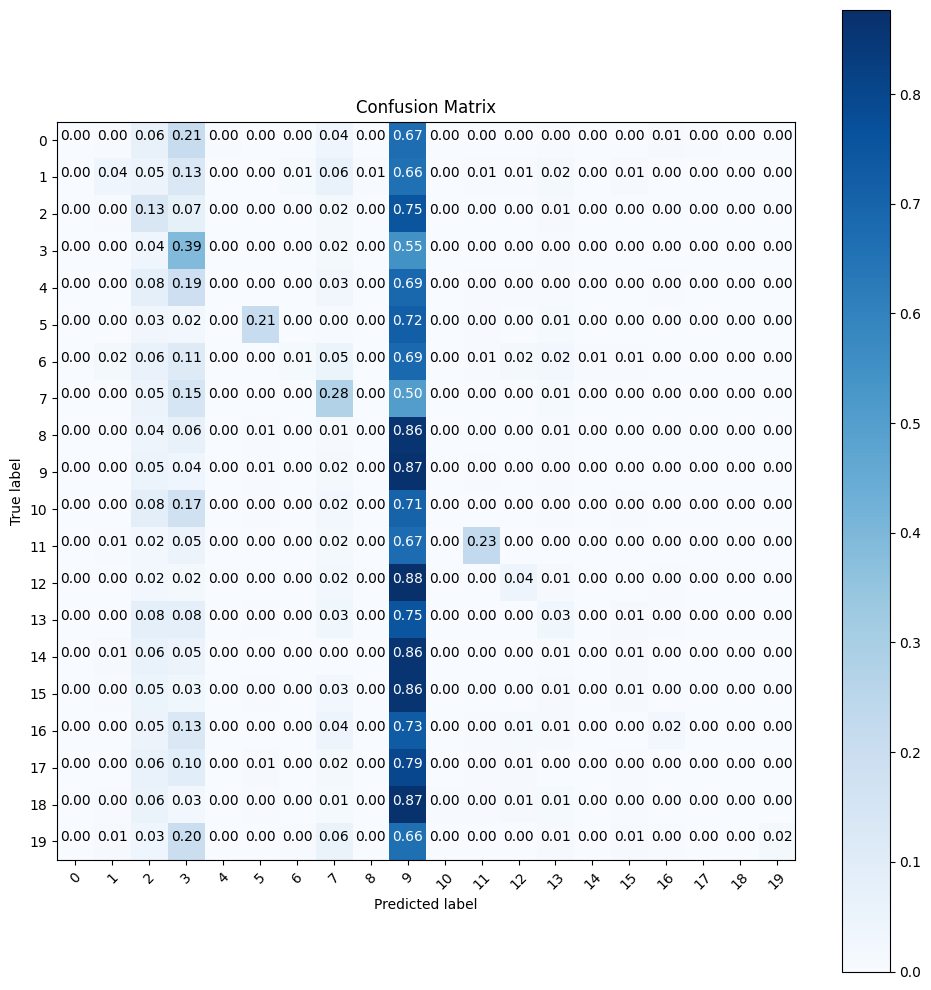

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [20]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.31      0.04      0.07       394
           2       0.23      0.13      0.17      1106
           3       0.33      0.39      0.36       957
           4       0.00      0.00      0.00       270
           5       0.66      0.21      0.32       288
           6       0.33      0.01      0.02       340
           7       0.45      0.28      0.34       674
           8       0.00      0.00      0.00       296
           9       0.25      0.87      0.39      2229
          10       0.00      0.00      0.00       241
          11       0.78      0.23      0.35       383
          12       0.32      0.04      0.08       292
          13       0.18      0.03      0.06       484
          14       0.12      0.00      0.01       342
          15       0.12      0.01      0.01       579
          16       0.35      0.02      0.04       435
          17       0.00    

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

# Over-Sampling Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_osm, y_train_osm = os.fit_resample(X_train, y_train)

In [ ]:
sns.countplot(x=y_train_osm, palette="viridis")
plt.show()

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_osm, y_train_osm)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_osm, y_train_osm)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

## Tokenization

In [12]:
X = df["TEXT"].values
y = df["Label"].values

In [13]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [14]:
X = X.reshape(-1,)
X.shape

(301820,)

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [16]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['vacation wasted vacation photobomb tired vacationwasted mcgar miami port of…'
 'oh wynwood ’ funny wynwood art itwasam flowers vibes wynwood…'
 'friends since th grade look us following dreams love and…'
 'looks like someone loves unconditionally oh puppy brother htx…'
 'rt white family invited black barbecue ive never laughed hard life'
 'track season im ready ya university incarnate word'
 'merry christmas filthy little animals wearing ugly sweater featuring santa…'
 'westenders lazznation weston toronto'
 'maxwell heads home summa akron city hospital'
 'story saturday collins ave miami beach fl ladies contact join my…'] 

Sequences


[[485, 5762, 485, 6138, 1605, 15382, 15383, 72, 1122, 229],
 [159, 1096, 9, 664, 1096, 132, 22107, 1266, 311, 12390],
 [59, 371, 48, 2014, 60, 38, 2422, 523, 2, 208],
 [331, 19, 409, 391, 17126, 159, 1002, 380, 13204],
 [1345, 192, 39, 7512, 352, 5081, 185, 79, 7090, 267, 36],
 [1072, 189, 17, 91, 204, 28, 25554, 1485],
 [67, 8, 3090, 32, 1619, 780, 1064, 1681, 1307, 3701],
 [40168, 40169, 3878, 230],
 [8427, 4150, 51, 5082, 3827, 24, 1114],
 [908, 130, 3828, 1144, 72, 10, 329, 247, 2311, 581, 499]]

In [17]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(100,110):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  100 ----> take
Index:  101 ----> photo
Index:  102 ----> north
Index:  103 ----> two
Index:  104 ----> bar
Index:  105 ----> getting
Index:  106 ----> la
Index:  107 ----> sunday
Index:  108 ----> party
Index:  109 ----> going


In [18]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 84332


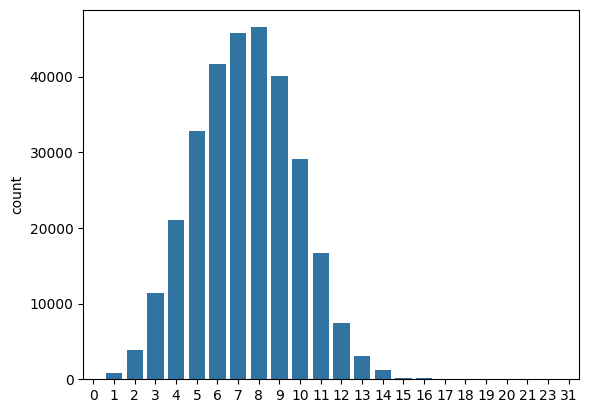

In [19]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [20]:
from tensorflow.keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [21]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[485, 5762, 485, 6138, 1605, 15382, 15383, 72, 1122, 229]]

After Padding
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0   485  5762   485  6138  1605 15382
  15383    72  1122   229]]


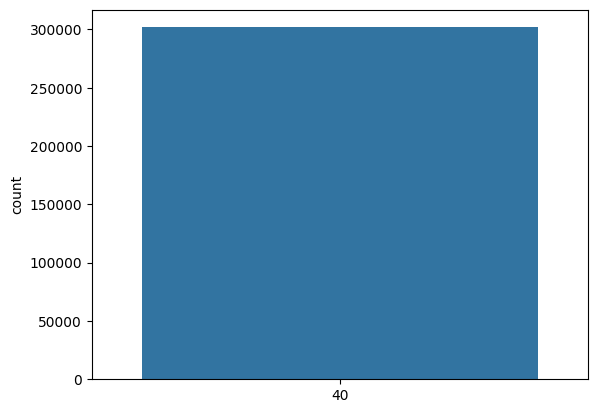

In [22]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (211274, 40)
Training y Dim  (211274,)
Test X Dim  (90546, 40)
Test y Dim  (90546,)


# Deep Learning Model using LSTMs

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [42]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [44]:
batch_size=256
epochs = 20

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs, shuffle=True,
          validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 76s 92ms/step - accuracy: 0.2480 - loss: 2.3936 - val_accuracy: 0.5286 - val_loss: 1.6318
Epoch 2/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.5668 - loss: 1.4914 - val_accuracy: 0.6932 - val_loss: 1.1377
Epoch 3/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.7213 - loss: 1.0328 - val_accuracy: 0.7565 - val_loss: 0.9231
Epoch 4/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.7889 - loss: 0.7947 - val_accuracy: 0.7945 - val_loss: 0.7982
Epoch 5/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.8273 - loss: 0.6485 - val_accuracy: 0.8117 - val_loss: 0.7352
Epoch 6/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.8508 - loss: 0.5569 - val_accuracy: 0.8254 - val_loss: 0.6969
Epoch 7/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.8686 - loss: 0.4874 - val_accuracy: 0.8390 - val_loss: 0.6767
Epoch 8/20
826/826 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.8808 - loss: 0.4400 - 

In [45]:
model.save('Emoji_Prediction.h5')

In [46]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

354/354 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8731 - loss: 0.6111


[0.607799768447876, 0.8734124302864075]

# Deep Learning Model using Bidirectional-LSTMs

In [1]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(60,return_sequences=True)))
model.add(Bidirectional(LSTM(60,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))
model.build(input_shape=(None, seq_len))
model.summary()

NameError: name 'vocab_size' is not defined

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopp = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [26]:
from keras.utils import to_categorical

y_trainn_cat = to_categorical(y_train)
y_testt_cat = to_categorical(y_test)

In [27]:
batch_size=64
epochs = 15

model.fit(X_train, y_trainn_cat, batch_size=batch_size, epochs = epochs, 
          shuffle=True,validation_data=(X_test, y_testt_cat), callbacks=[early_stopp])

Epoch 1/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 460s 137ms/step - accuracy: 0.1997 - loss: 2.5822 - val_accuracy: 0.6192 - val_loss: 1.2818
Epoch 2/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 467s 142ms/step - accuracy: 0.6920 - loss: 1.0705 - val_accuracy: 0.7817 - val_loss: 0.7637
Epoch 3/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 484s 147ms/step - accuracy: 0.8322 - loss: 0.5926 - val_accuracy: 0.8421 - val_loss: 0.5768
Epoch 4/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 482s 146ms/step - accuracy: 0.8888 - loss: 0.4018 - val_accuracy: 0.8721 - val_loss: 0.4996
Epoch 5/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 482s 146ms/step - accuracy: 0.9182 - loss: 0.2968 - val_accuracy: 0.8900 - val_loss: 0.4727
Epoch 6/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 485s 147ms/step - accuracy: 0.9378 - loss: 0.2299 - val_accuracy: 0.9008 - val_loss: 0.4552
Epoch 7/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 487s 147ms/step - accuracy: 0.9492 - loss: 0.1910 - val_accuracy: 0.9093 - val_loss: 0.4412
Epoch 8/15
3302/3302 ━━━━━━━━━━━━━━━━━━━━ 488s 148ms/step - ac

In [32]:
model.save_weights('BILSTM.weights.h5')

In [28]:
import os
if os.path.exists('BILSTM.keras'):
    # Handle the existing file (e.g., delete or rename it)
    os.remove('BILSTM.keras')

model.save('BILSTM.keras')

In [30]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [29]:
model.evaluate(X_test, y_testt_cat, batch_size=batch_size)


1415/1415 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9136 - loss: 0.4537


[0.4510381817817688, 0.9145406484603882]

In [59]:
import joblib

# Assuming you have a tokenizer object named 'tokenizer'
joblib.dump(tokenizer, 'tokenizer.joblib')

['tokenizer.joblib']

# Model Evaluation

In [ ]:
model = tf.keras.models.load_model('Emoji_Prediction.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred)


In [ ]:
plt.figure(figsize=(15,15))
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True)                                                                   
plt.show()

# Results

In [ ]:
accuracy=[0.27,0.29,0.90,0.94]
labels=['Naive Bayes','Support Vector Classifier','LSTM','Bidirectional LSTM']


sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x=labels, y=accuracy)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.show()